## CS381 Data Analytics: Homework 1 Answer

In [18]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading MPG dataset ##

In [19]:
mpg = pd.read_csv("mpg2.csv")
print(mpg.shape)
mpg.head()

(400, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Question 1. Check if there are any null or NA

In [20]:
mpg.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [21]:
mpg.dropna(inplace=True)
mpg.shape

(393, 9)

## Question 3. Check if there is any outliers in the mpg field

count    393.000000
mean      23.615267
std        8.487261
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       90.000000
Name: mpg, dtype: float64


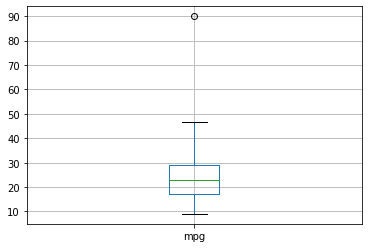

In [22]:
print(mpg.mpg.describe())
# use boxplot from dataframe
mpg.boxplot(column=['mpg'])

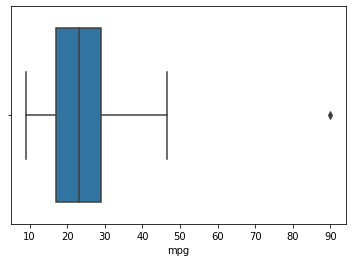

In [23]:
# or use seaborn
sns.boxplot(x=mpg['mpg'])

## Question 4. Display and then Remove the one outlier row. You should now have 392 rows

In [24]:
mpg[mpg.mpg > 60]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
9,90.0,8,451.0,450.0,2555,8.0,2020,usa,tesla model Y


In [25]:
mpg = mpg[ mpg.mpg < 60]
mpg.shape

(392, 9)

## Question 5. Calculate the average acceleration cars made in usa using SQL

**Type in your code here**

**Question 1 Answer**

In [26]:
sql = "select count(*) as Count, avg(acceleration) from mpg where origin = 'usa'"
df = ps.sqldf(sql)
df

,Count,avg(acceleration)
0,245,14.990204


## Question 6. Calculate the average horsepower for each country using SQL

**Type in your code here**

**Question 6 Answer**

In [27]:
print(ps.sqldf("select origin, avg(horsepower) from mpg group by origin"))


   origin  avg(horsepower)
0  europe        80.558824
1   japan        79.835443
2     usa       119.048980


## Question 7. Calculate the number of occurrences, mean, min, max of the weight for each country using SQL

In [28]:
sql = "select origin, count(*), avg(weight), min(weight), max(weight) from mpg group by origin"
print(ps.sqldf(sql))

   origin  count(*)  avg(weight)  min(weight)  max(weight)
0  europe        68  2433.470588         1825         3820
1   japan        79  2221.227848         1613         2930
2     usa       245  3372.489796         1800         5140


## Question 8. Answer Question 7 but use Pandas functions

**Type in your code here**

In [29]:
gpby = mpg.groupby(['origin'])['weight']
print("Count")
print(gpby.count())
print("Mean weight by origin")
print(gpby.mean())
print("Min weight by origin")
print(gpby.min())
print("Max weight by origin")
print(gpby.max())

Count
origin
europe     68
japan      79
usa       245
Name: weight, dtype: int64
Mean weight by origin
origin
europe    2433.470588
japan     2221.227848
usa       3372.489796
Name: weight, dtype: float64
Min weight by origin
origin
europe    1825
japan     1613
usa       1800
Name: weight, dtype: int64
Max weight by origin
origin
europe    3820
japan     2930
usa       5140
Name: weight, dtype: int64


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the horsepower, weight and accleartion for each country

In [30]:
gpby = mpg.groupby(['origin'])['horsepower','weight','acceleration']
print("STD")
print(gpby.std())
print("\n")
print("Skew")
print(gpby.skew())

STD
        horsepower      weight  acceleration
origin                                      
europe   20.157871  491.813867      3.087813
japan    17.819199  320.497248      1.954937
usa      39.897790  795.346690      2.736020


Skew
        horsepower    weight  acceleration
origin                                    
europe    0.472850  0.812081      0.945656
japan     0.660375  0.498497      0.042795
usa       0.763248  0.067009      0.098737


In [31]:
print("USA Kurtosis")
print(mpg[mpg.origin == 'usa'][['horsepower','weight','acceleration']].kurtosis())
print("\nEurope Kurtosis")
print(mpg[mpg.origin == 'europe'][['horsepower','weight','acceleration']].kurtosis())
print("\nJapan Kurtosis")
print(mpg[mpg.origin == 'japan'][['horsepower','weight','acceleration']].kurtosis())

USA Kurtosis
horsepower     -0.189521
weight         -0.965494
acceleration   -0.142774
dtype: float64

Europe Kurtosis
horsepower     -0.059514
weight         -0.249813
acceleration    0.036290
dtype: float64

Japan Kurtosis
horsepower     -0.131696
weight         -0.380625
acceleration   -0.528450
dtype: float64


## Question 10. How would you describe the acceleration distribution for different country based on the Skew?

All has positive skew with Europe has highest skew, while Japan and USA has close to zero skew. 

## Question 11. How would you describe the acceleration distribution for different country based on Kurotsis?

USA and Japan has negative kurtosis with Japan being more negative while Europe has positive kurtosis

## Question 12. Plot the histogram of acceleration distribution for different country

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b016a20>,
      dtype=object)

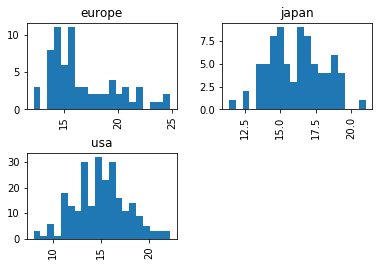

In [32]:
mpg['acceleration'].hist(by=mpg['origin'], bins=20)

## Question 13. Calculate correlation of all the factors among themselves

In [33]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


## Question 14. Which factors (cylinders, horsepower or weight) will affect your mileage the most based on correlation?

Weight affect mpg the most

## Question 15. Does the result depend on the country? If yes, how?

In [34]:
print("\nUSA")
print(mpg[mpg['origin'] == 'usa'].corr())
print("\nJapan")
print(mpg[mpg['origin'] == 'japan'].corr())
print("\nEurope")
print(mpg[mpg['origin'] == 'europe'].corr())


USA
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.824524     -0.834628   -0.751570 -0.846424   
cylinders    -0.824524   1.000000      0.933885    0.827646  0.881609   
displacement -0.834628   0.933885      1.000000    0.902744  0.917588   
horsepower   -0.751570   0.827646      0.902744    1.000000  0.838450   
weight       -0.846424   0.881609      0.917588    0.838450  1.000000   
acceleration  0.377239  -0.563293     -0.619890   -0.719191 -0.440230   
model_year    0.648641  -0.463986     -0.497591   -0.495009 -0.406388   

              acceleration  model_year  
mpg               0.377239    0.648641  
cylinders        -0.563293   -0.463986  
displacement     -0.619890   -0.497591  
horsepower       -0.719191   -0.495009  
weight           -0.440230   -0.406388  
acceleration      1.000000    0.380878  
model_year        0.380878    1.000000  

Japan
                   mpg  cylinders  displacement  horsepower    weight  \
mp

Yes, results depend on country. For car made in Japan and Europe, horsepower is a stronger factor while weight is the strongest factor for cars made in USA